In [ ]:
pip install -q transformers

In [ ]:
from transformers import pipeline
import skimage
import numpy as np
from PIL import Image




In [ ]:
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

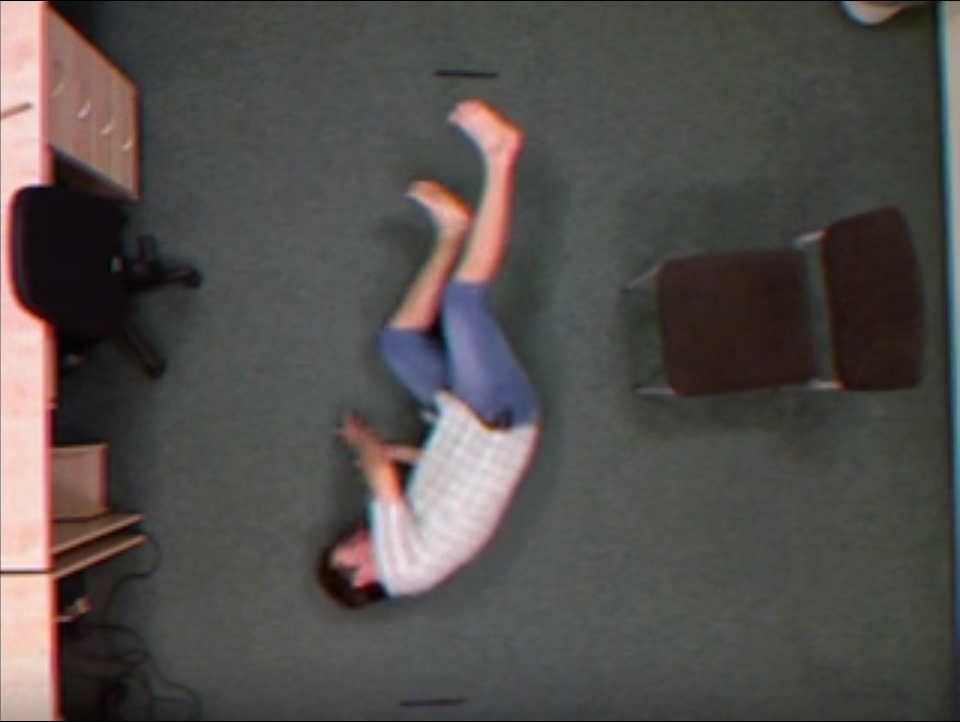

In [ ]:
from PIL import Image
image=Image.open("/content/data1/fall1.PNG")
image = Image.fromarray(np.uint8(image)).convert("RGB")
image

In [ ]:
predictions = detector(
    image,
    candidate_labels=["human"],
)
predictions

[{'score': 0.2512147128582001,
  'label': 'human',
  'box': {'xmin': 315, 'ymin': 73, 'xmax': 543, 'ymax': 458}}]

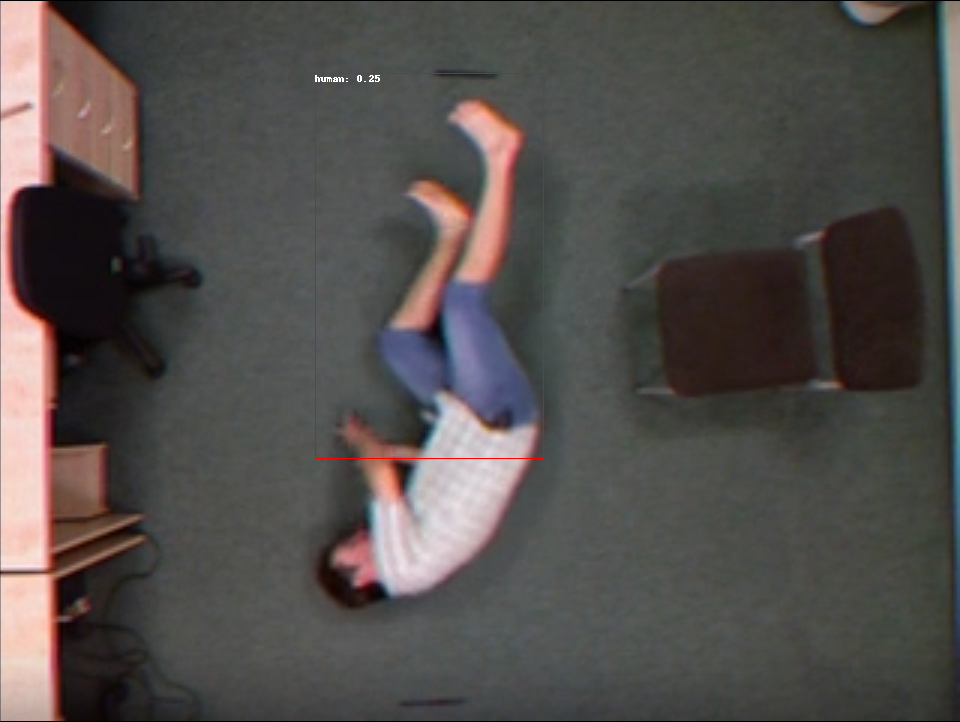

In [ ]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image

In [ ]:
pip install mediapipe

In [ ]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # For drawing keypoints
points = mpPose.PoseLandmark # Landmarks
path = "/content/data1" # enter dataset path
data = []
for p in points:
        x = str(p)[13:]
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")
data = pd.DataFrame(columns = data) # Empty dataset

In [ ]:
from google.colab.patches import cv2_imshow

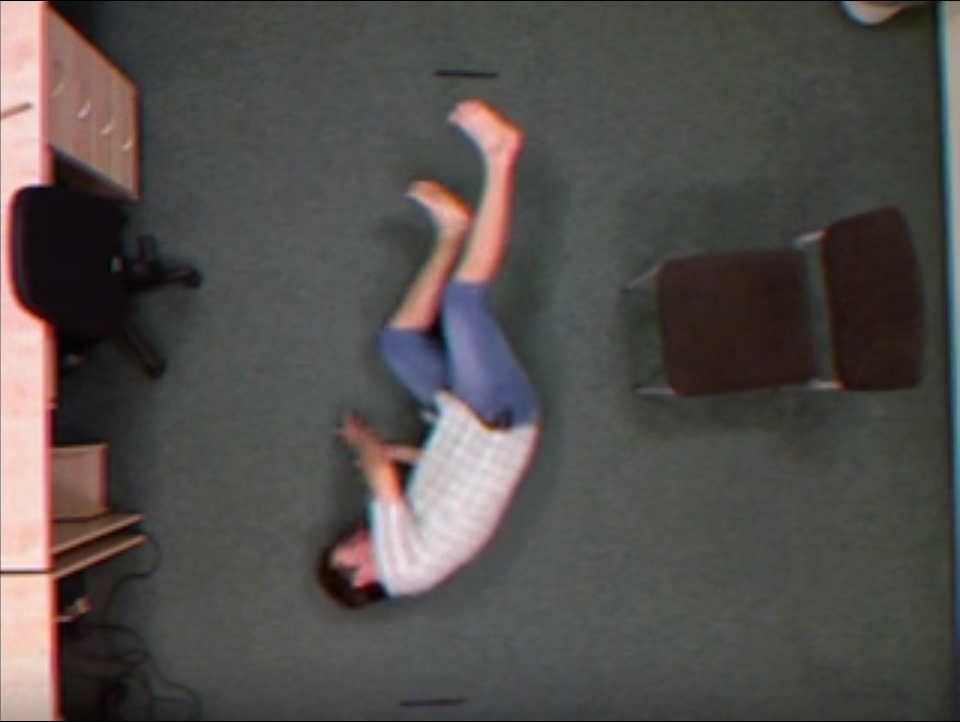

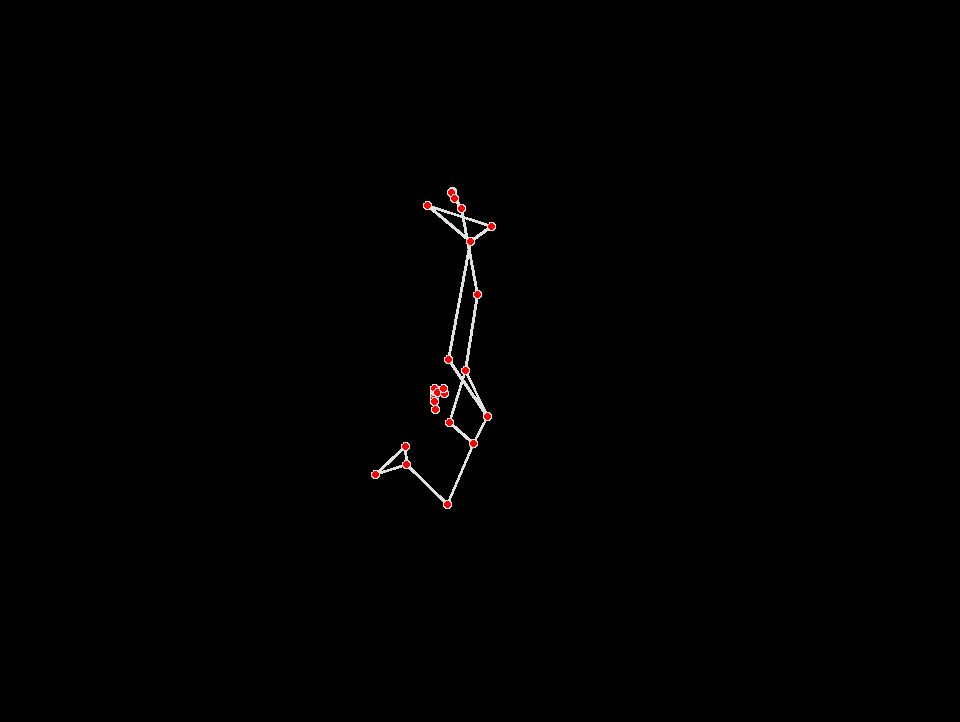

<bound method NDFrame.to_csv of      NOSE_x    NOSE_y    NOSE_z  NOSE_vis  LEFT_EYE_INNER_x  LEFT_EYE_INNER_y  \
1  0.513990  0.272977 -0.139345  0.999510          0.512309          0.256426   
0  0.456636  0.541354 -0.564981  0.999486          0.452256          0.549391   

   LEFT_EYE_INNER_z  LEFT_EYE_INNER_vis  LEFT_EYE_x  LEFT_EYE_y  ...  \
1         -0.158238            0.999142    0.514508    0.253472  ...   
0         -0.580954            0.999163    0.452721    0.552379  ...   

   RIGHT_HEEL_z  RIGHT_HEEL_vis  LEFT_FOOT_INDEX_x  LEFT_FOOT_INDEX_y  \
1      0.182356        0.944752           0.486476           0.805835   
0      0.074903        0.948525           0.390862           0.656895   

   LEFT_FOOT_INDEX_z  LEFT_FOOT_INDEX_vis  RIGHT_FOOT_INDEX_x  \
1          -0.266653             0.966944            0.563309   
0           0.349999             0.968370            0.445619   

   RIGHT_FOOT_INDEX_y  RIGHT_FOOT_INDEX_z  RIGHT_FOOT_INDEX_vis  
1            0.796804            0.112978              0.952062  
0            0.284309           -0.020065              0.955974  

[2 rows x 132 columns]>

In [ ]:
count = 0
lst=["fall1.PNG"]
for img in lst:

        temp = []

        img = cv2.imread("/content/data1/"+img)

        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]

                data.loc[count] = temp

                count +=1

        cv2_imshow(img)

        cv2_imshow(blackie)


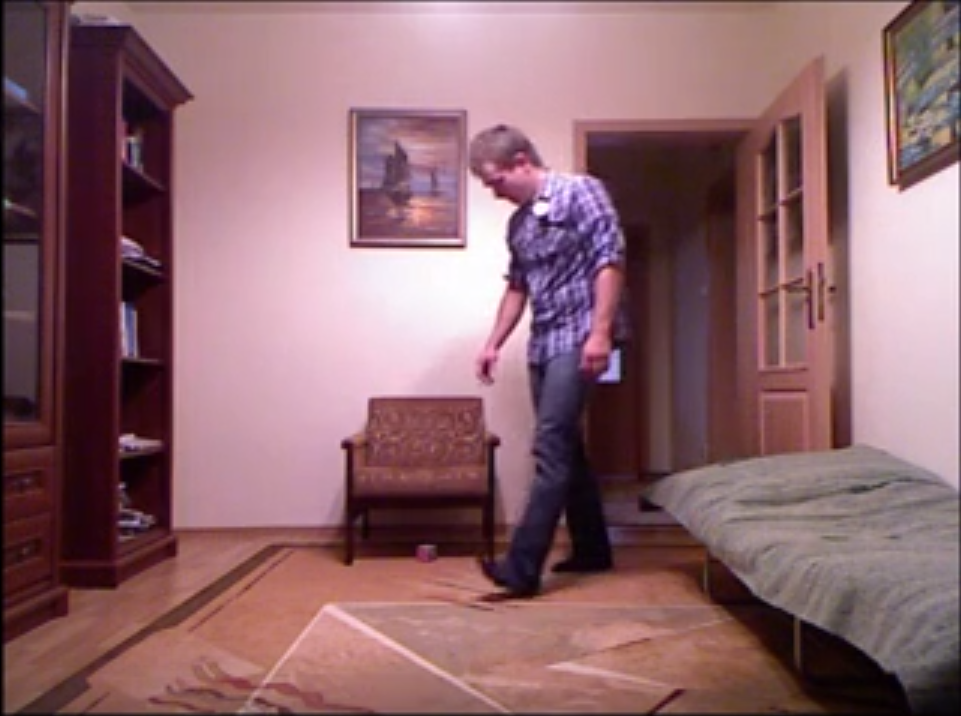

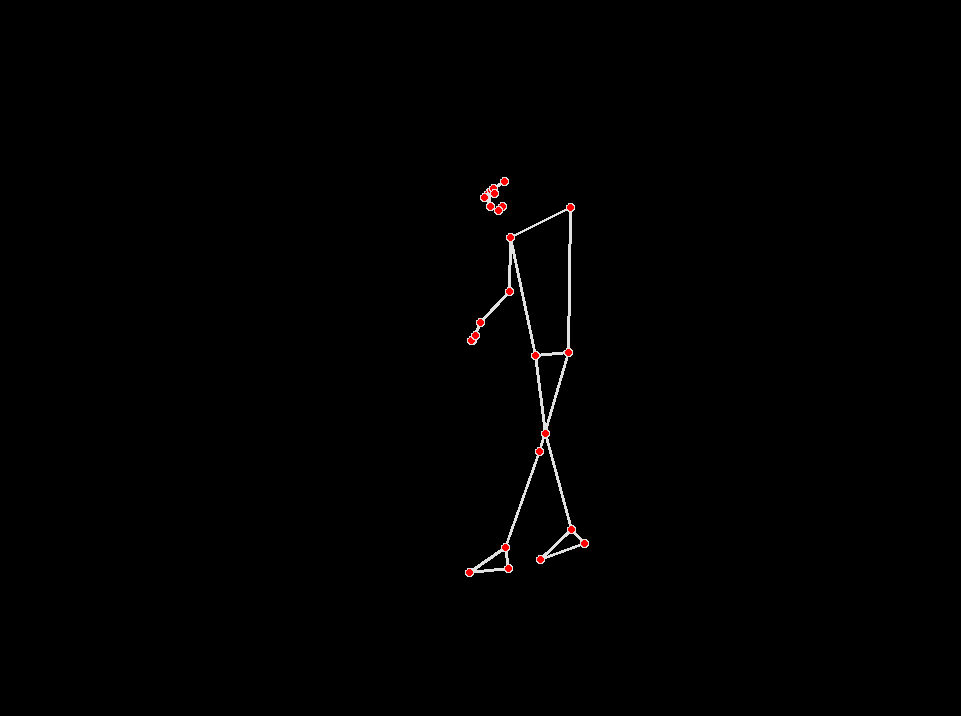

In [ ]:
count = 1
lst=["nofall.PNG"]
for img in lst:

        temp = []

        img = cv2.imread("/content/data1/"+img)

        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]

                data.loc[count] = temp

                count +=1

        cv2_imshow(img)

        cv2_imshow(blackie)


#data.to_csv("dataset3.csv") # save the data as a csv file

In [ ]:
data["Label"]=0
data.iloc[-1,-1]=1
data.to_csv("sampledata.csv")

In [ ]:
from sklearn.svm import SVC
X= data.iloc[:, :132]
Y=data.iloc[:, -1]
model = SVC(kernel = 'poly')
model.fit(X,Y)

SVC(kernel='poly')

TESTING PHASE


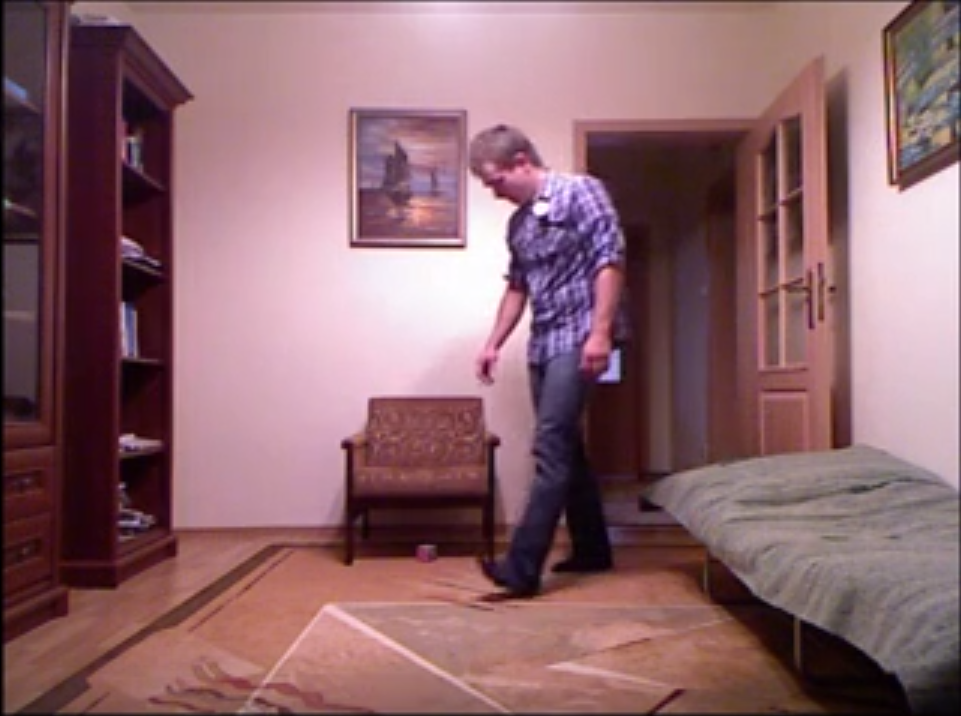

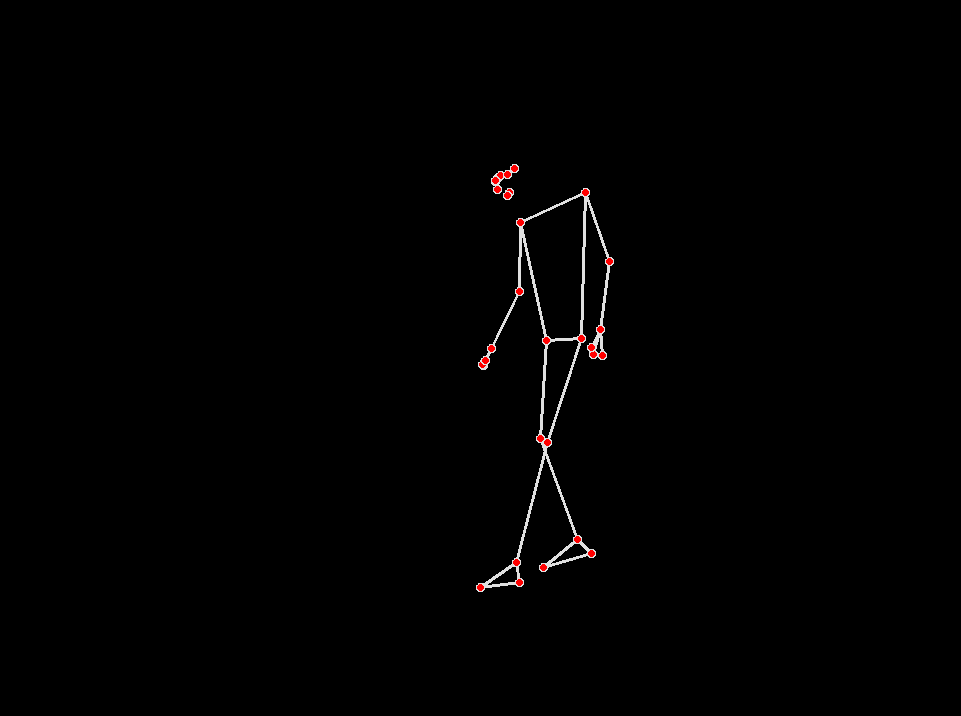

[0.5180951356887817,
 0.26506906747817993,
 -0.11859770119190216,
 0.999631404876709,
 0.5174766778945923,
 0.249905526638031,
 -0.1383916139602661,
 0.9993985891342163,
 0.5190986394882202,
 0.24747540056705475,
 -0.1384781002998352,
 0.9996045827865601,
 0.5208753347396851,
 0.24484337866306305,
 -0.13853153586387634,
 0.9993796944618225,
 0.5156450271606445,
 0.25296270847320557,
 -0.10303878039121628,
 0.999522864818573,
 0.5157789587974548,
 0.2528345286846161,
 -0.10302834957838058,
 0.9996034502983093,
 0.5159704685211182,
 0.25249871611595154,
 -0.10308526456356049,
 0.9994378089904785,
 0.5353044271469116,
 0.23531900346279144,
 -0.17362594604492188,
 0.9997387528419495,
 0.5286014676094055,
 0.24361945688724518,
 -0.011353838257491589,
 0.9992262125015259,
 0.5304941534996033,
 0.26933571696281433,
 -0.12693345546722412,
 0.9997069835662842,
 0.5277668237686157,
 0.2728847861289978,
 -0.07978904247283936,
 0.9995320439338684,
 0.6088500022888184,
 0.26930519938468933,
 -0.210

In [ ]:
counter=0
img="nofall.PNG"
temp = []
img = cv2.imread("/content/data1/"+img)
imageWidth, imageHeight = img.shape[:2]
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blackie = np.zeros(img.shape) # Blank image
results = pose.process(imgRGB)
if results.pose_landmarks:
    mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie
    landmarks = results.pose_landmarks.landmark
    for i,j in zip(points,landmarks):
        temp = temp + [j.x, j.y, j.z, j.visibility]
    count +=1
cv2_imshow(img)
cv2_imshow(blackie)
temp

In [ ]:
temp=np.array(temp)
model.predict(temp.reshape(1, -1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])